In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

%matplotlib inline
df = pd.read_csv('cervical.csv')
df.head()

,Age,Numberofsexualpartners,Firstsexualintercourse,Numofpregnancies,Smokes,Smokesyears,Smokespacksyear,HormonalContraceptives,HormonalContraceptivesyears,IUD,...,STDsHPV,STDsNumberofdiagnosis,DxCancer,DxCIN,DxHPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
3,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,3,23,2,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]/df.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [4]:
st = df.apply(LabelEncoder().fit_transform)
st.head()

,Age,Numberofsexualpartners,Firstsexualintercourse,Numofpregnancies,Smokes,Smokesyears,Smokespacksyear,HormonalContraceptives,HormonalContraceptivesyears,IUD,...,STDsHPV,STDsNumberofdiagnosis,DxCancer,DxCIN,DxHPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,5,3,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,39,4,6,4,1,29,52,1,18,0,...,0,0,1,0,1,0,0,0,0,0
3,33,2,11,4,0,0,0,1,32,0,...,0,0,0,0,0,0,0,0,0,0
4,29,2,13,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


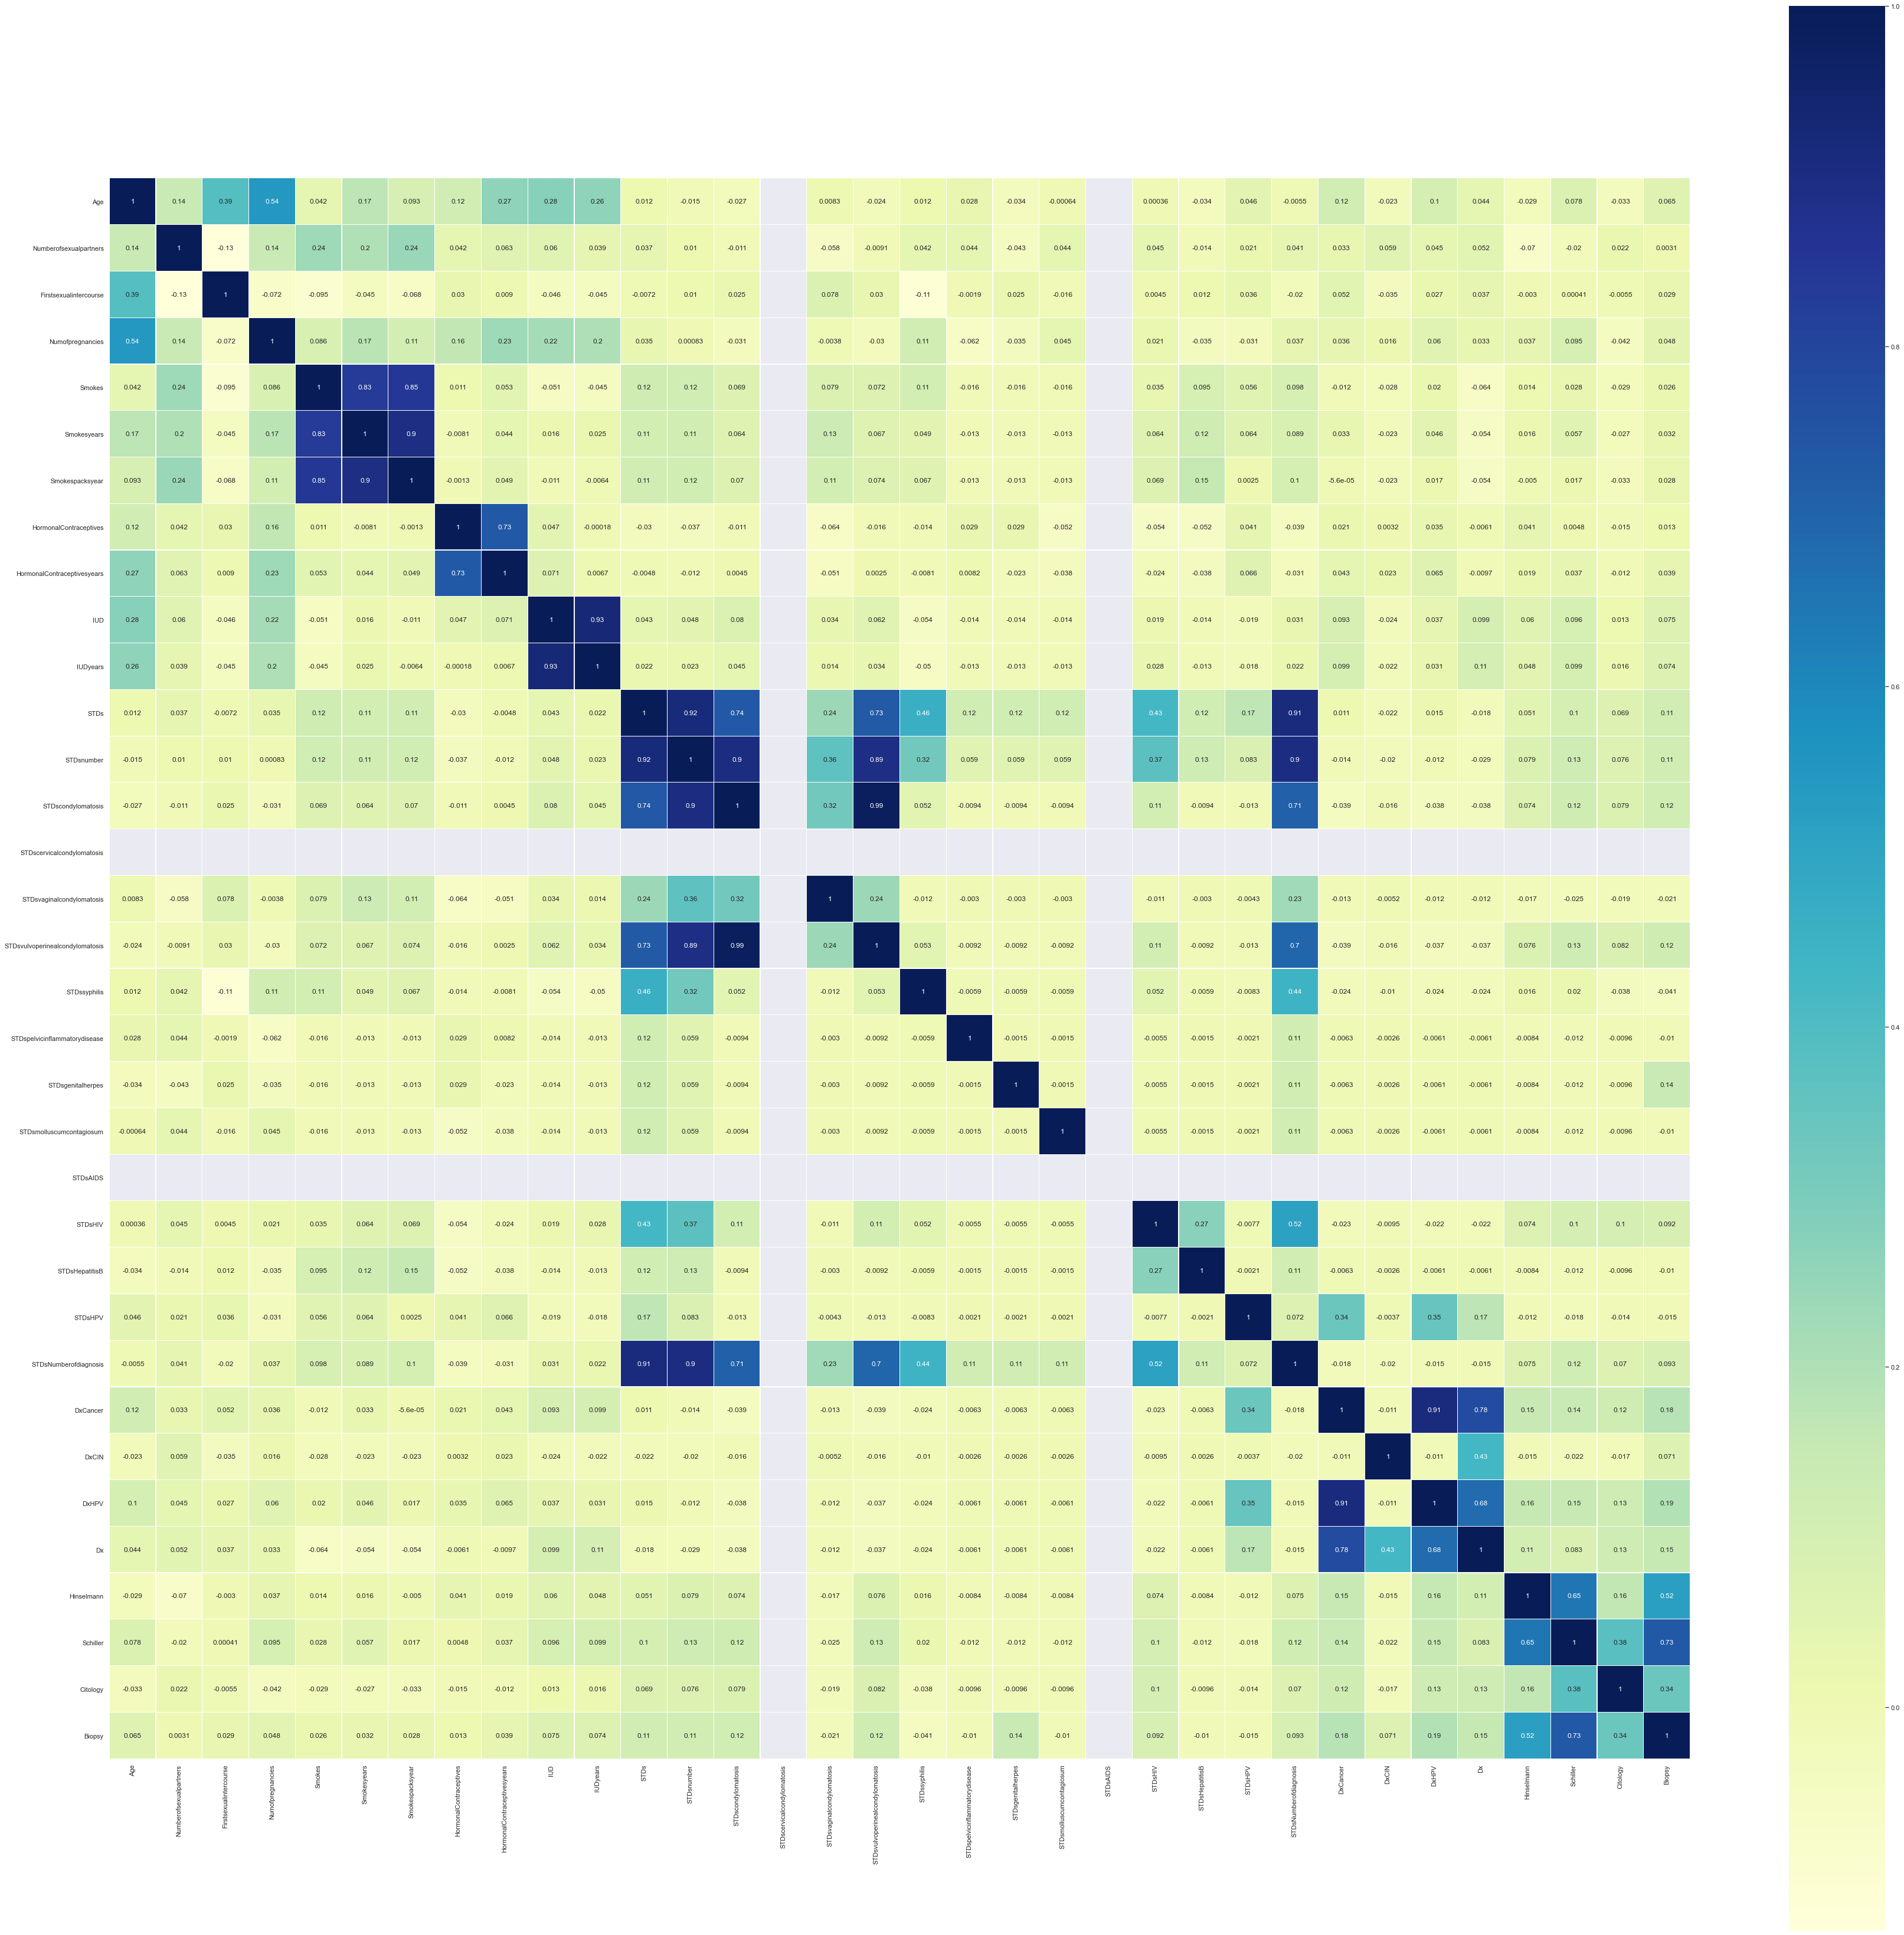

In [5]:
sns.set(color_codes=True)
plt.figure(figsize=(60,60))
sns.heatmap(st.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu")
plt.show() # Show co-relation mapping

In [6]:
df.columns

Index(['Age', 'Numberofsexualpartners', 'Firstsexualintercourse',
       'Numofpregnancies', 'Smokes', 'Smokesyears', 'Smokespacksyear',
       'HormonalContraceptives', 'HormonalContraceptivesyears', 'IUD',
       'IUDyears', 'STDs', 'STDsnumber', 'STDscondylomatosis',
       'STDscervicalcondylomatosis', 'STDsvaginalcondylomatosis',
       'STDsvulvoperinealcondylomatosis', 'STDssyphilis',
       'STDspelvicinflammatorydisease', 'STDsgenitalherpes',
       'STDsmolluscumcontagiosum', 'STDsAIDS', 'STDsHIV', 'STDsHepatitisB',
       'STDsHPV', 'STDsNumberofdiagnosis', 'DxCancer', 'DxCIN', 'DxHPV', 'Dx',
       'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

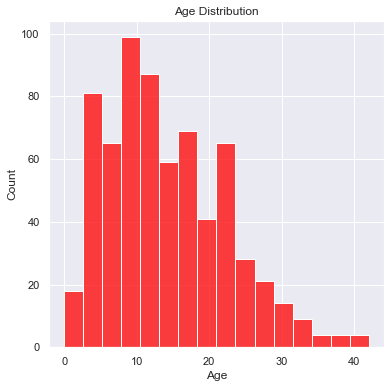

In [7]:
plt.figure(figsize=(6,6))
plt.title("Age Distribution")
ax = sns.histplot(st["Age"], color = 'red')

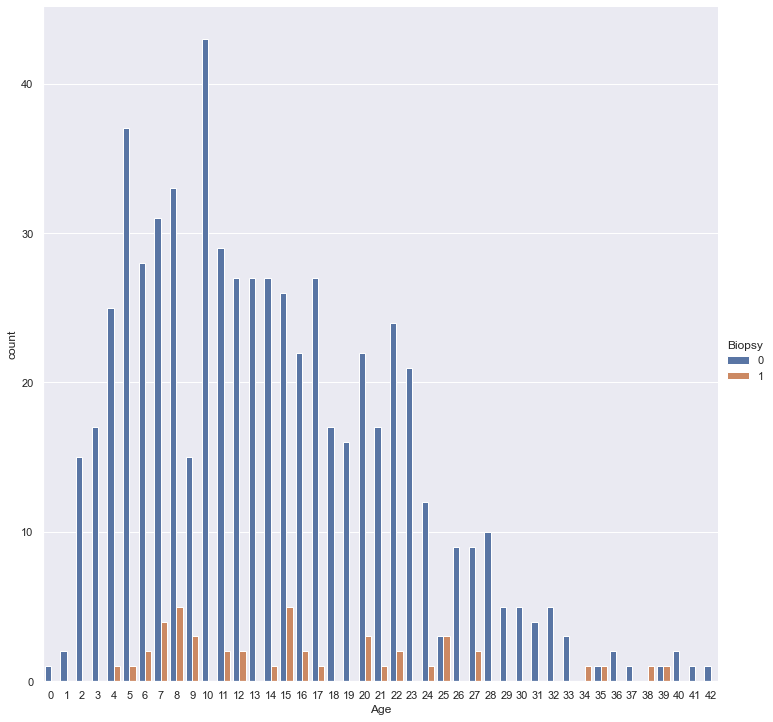

In [8]:
sns.catplot(x="Age", kind="count", hue = "Biopsy" , data = st, height=10)
#plt.show()

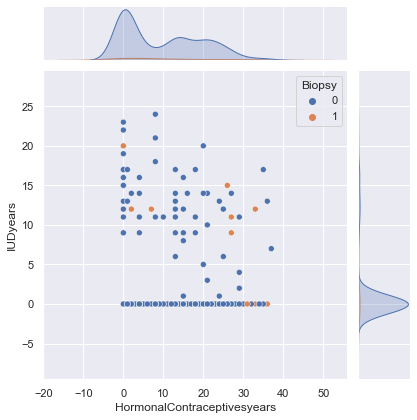

In [9]:
sns.jointplot(data=st, x="HormonalContraceptivesyears", y="IUDyears", hue="Biopsy")

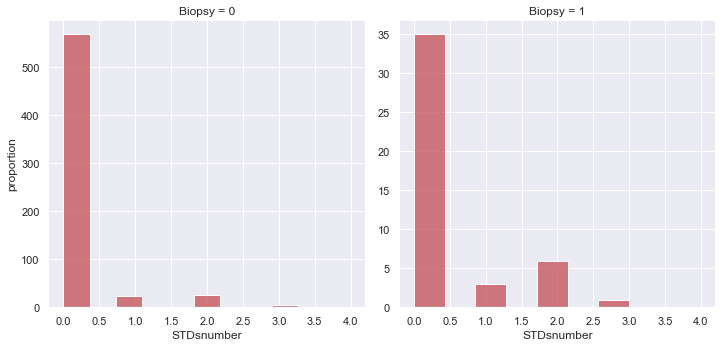

In [10]:
g = sns.FacetGrid(st, col="Biopsy", height=5, sharey=False, sharex = True)
g.map(sns.histplot, "STDsnumber", color = 'r');
g.set_axis_labels("STDsnumber", "proportion");
g.despine(left=True)

In [11]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<ipython-input-11-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


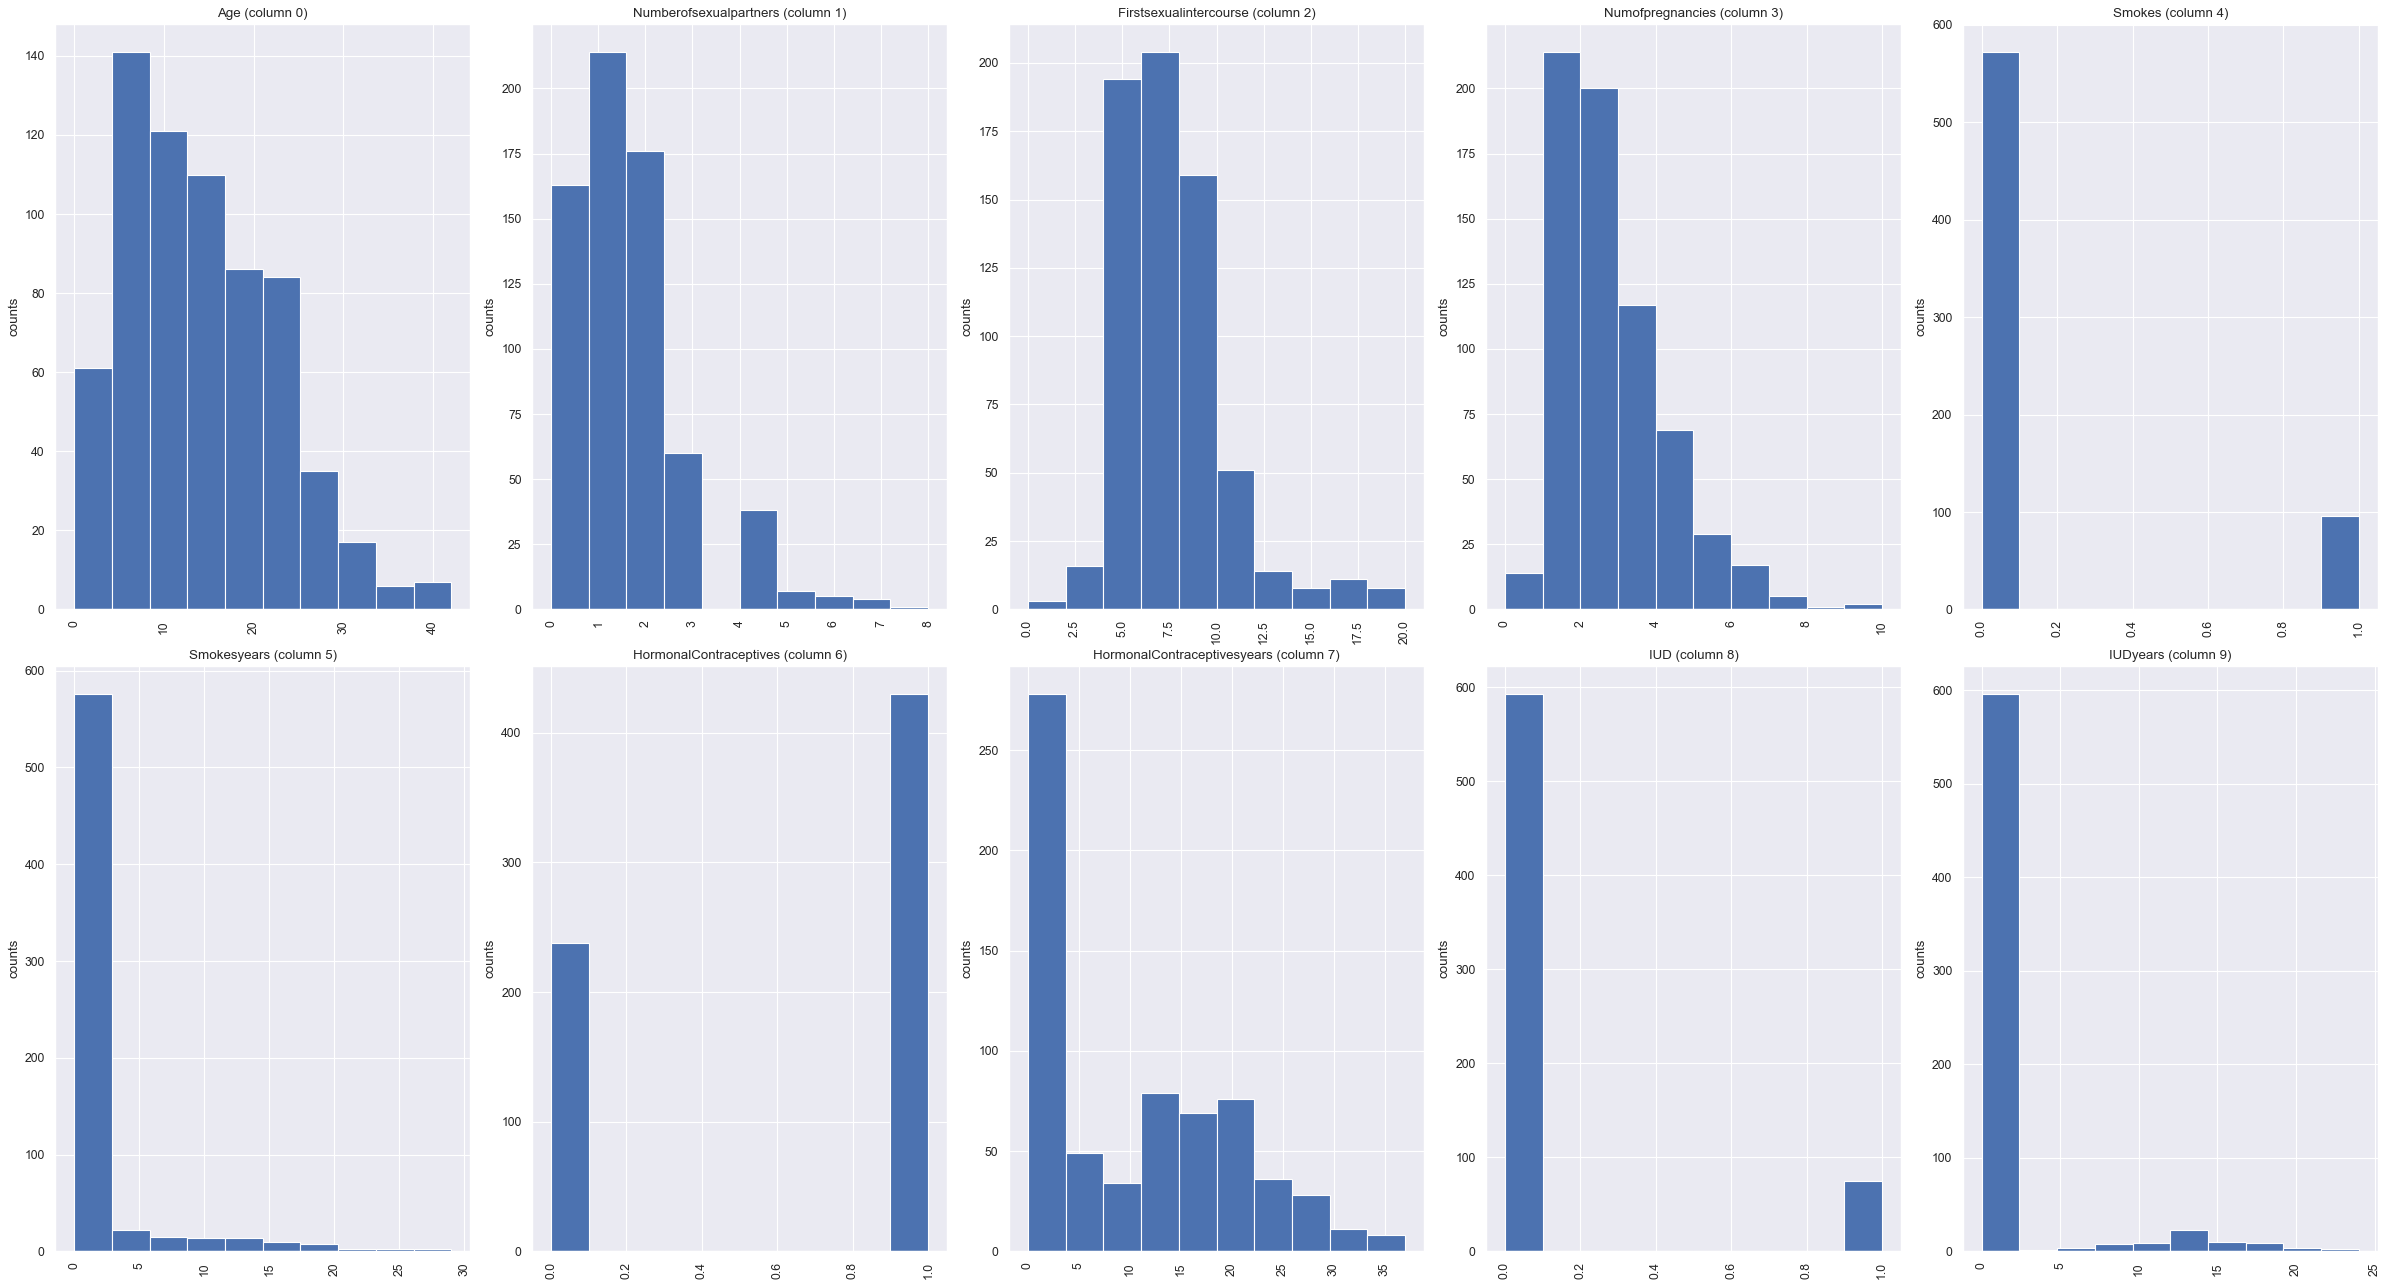

In [12]:
plotPerColumnDistribution(st, 10, 5)

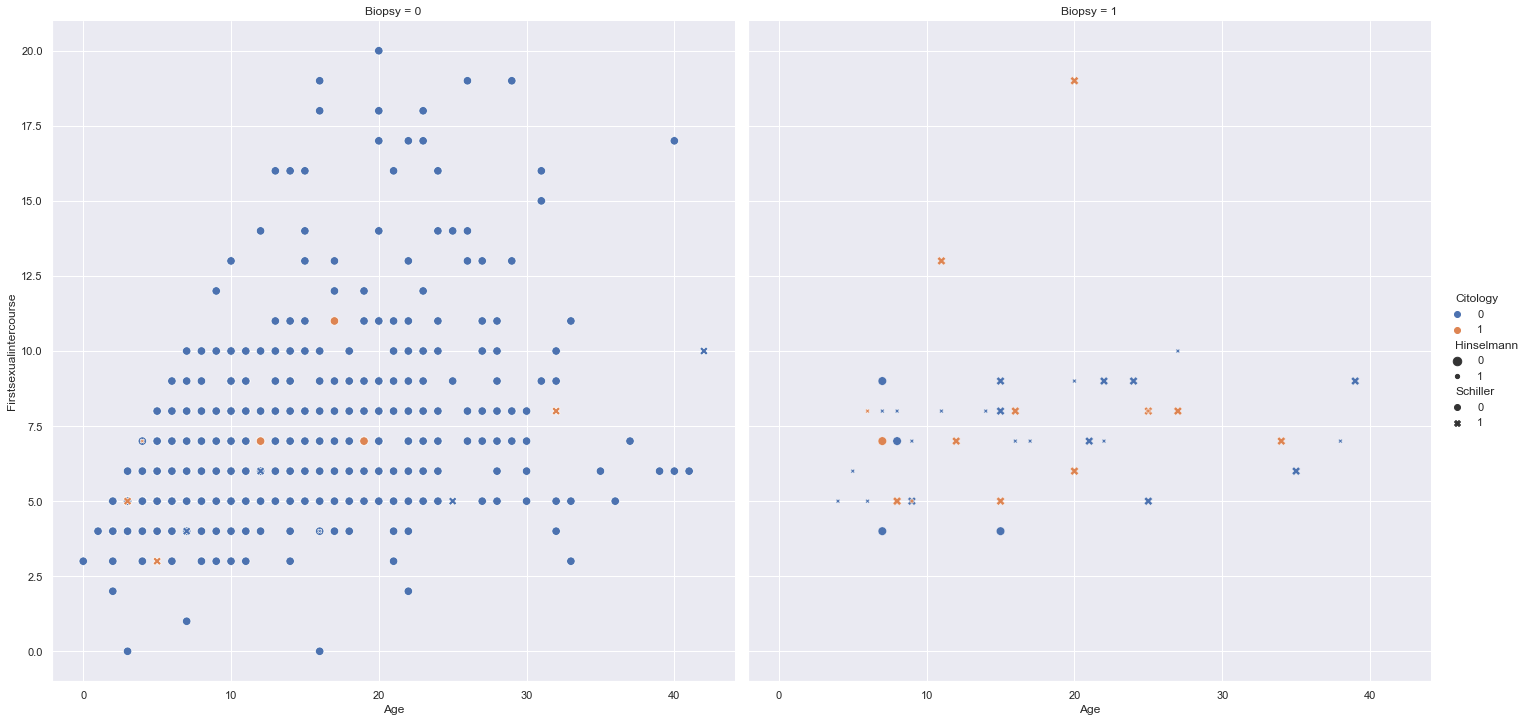

In [25]:
sns.relplot(
    data=st,
    x="Age", y="Firstsexualintercourse", col="Biopsy",
    hue="Citology", style="Schiller", size="Hinselmann", height=10)#size=""


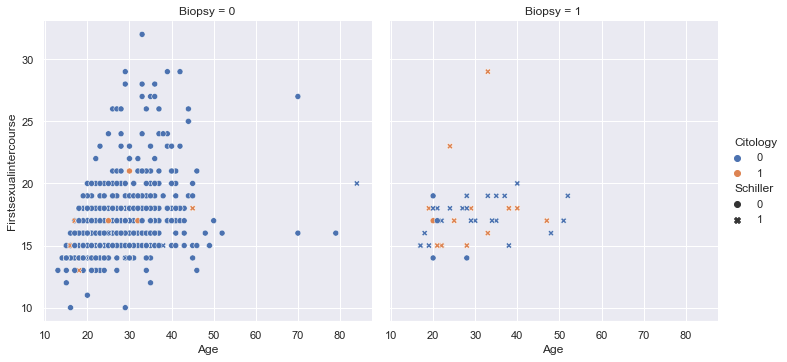

In [17]:
sns.relplot(
    data=df,
    x="Age", y="Firstsexualintercourse", col="Biopsy",
    hue="Citology", style="Schiller")

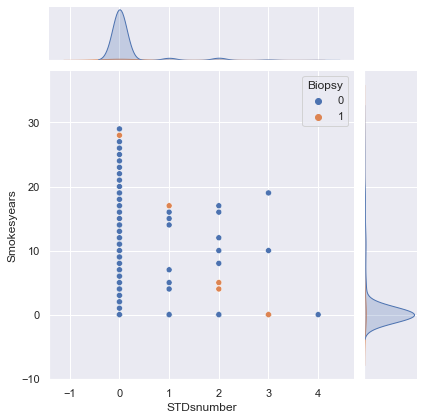

In [61]:
sns.jointplot(data=st, x="STDsnumber", y="Smokesyears", hue="Biopsy")

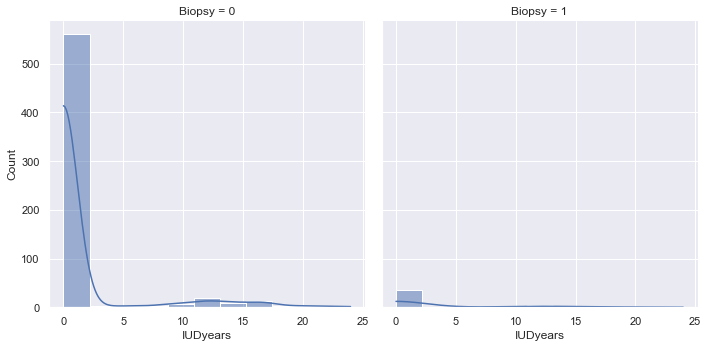

In [29]:
sns.displot(data=st, x="IUDyears", col="Biopsy", kde=True)

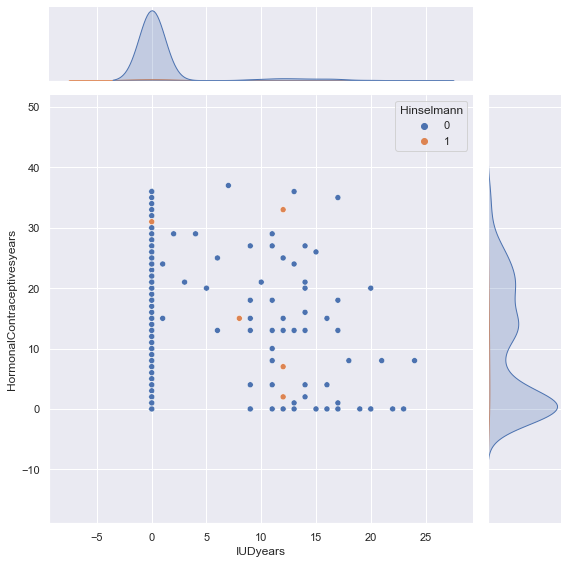

In [34]:
sns.jointplot(data=st, x="IUDyears", y="HormonalContraceptivesyears", hue="Hinselmann", height=8)

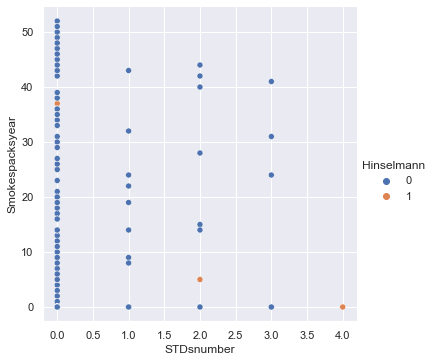

In [62]:
#sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
sns.relplot(data=st, x="STDsnumber", y="Smokespacksyear",  hue="Hinselmann") #col="Biopsy",

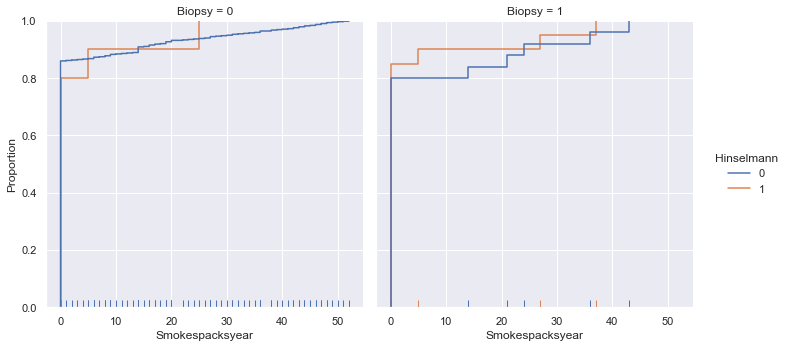

In [49]:
sns.displot(data=st, kind="ecdf", x="Smokespacksyear", col="Biopsy", hue="Hinselmann", rug=True)

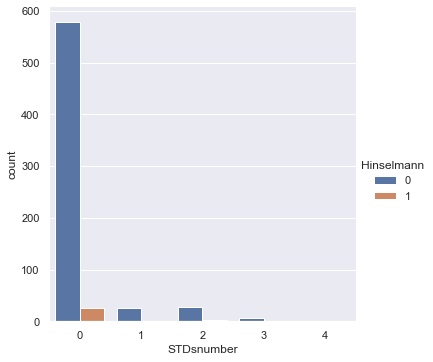

In [50]:
sns.catplot(data=st, kind="count", x="STDsnumber", hue="Hinselmann")
plt.show()

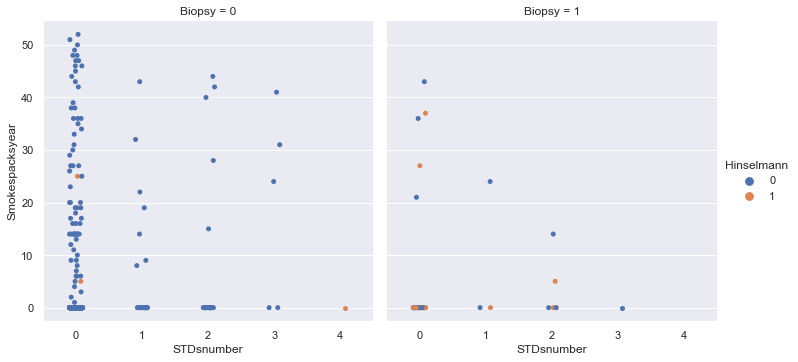

In [53]:
sns.catplot(x="STDsnumber", y="Smokespacksyear", hue="Hinselmann", col="Biopsy", data=st)

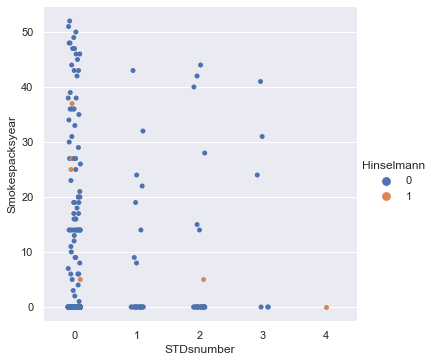

In [68]:
sns.catplot(x="STDsnumber", y="Smokespacksyear", hue="Hinselmann", data=st)

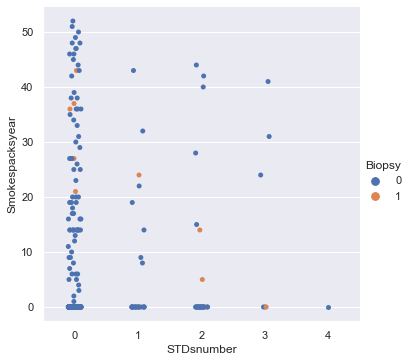

In [66]:
sns.catplot(x="STDsnumber", y="Smokespacksyear",  hue="Biopsy", data=st)

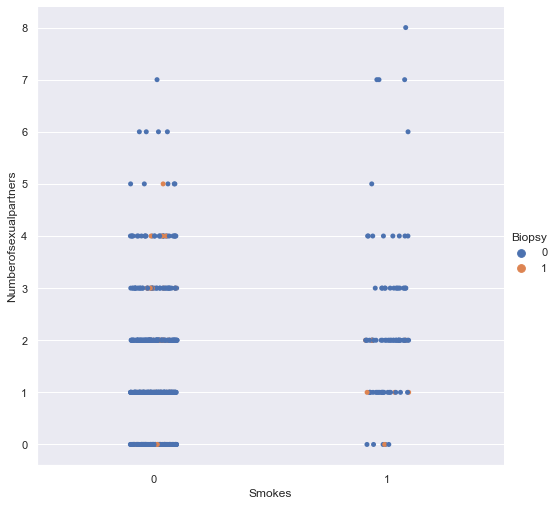

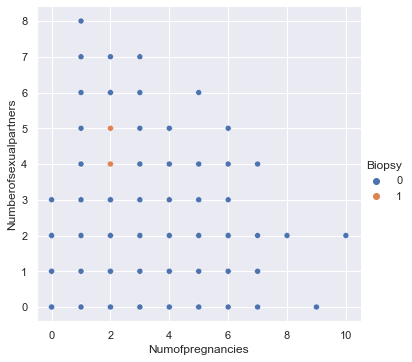

In [79]:
sns.catplot(data=st, y="Numberofsexualpartners", x="Smokes", hue="Biopsy",height=7)
sns.relplot(x="Numofpregnancies", y="Numberofsexualpartners", hue="Biopsy", data=st);

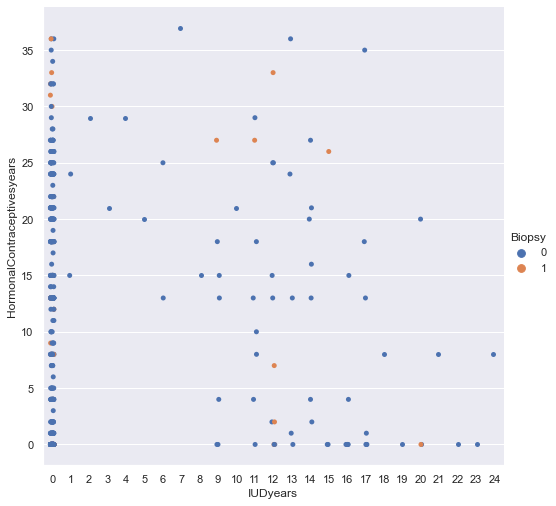

In [60]:
sns.catplot(data=st, x="IUDyears", y="HormonalContraceptivesyears", hue="Biopsy", height=7)

In [1]:
sns.catplot(data=st, kind="count", x="Smokes", hue="Biopsy",)


NameError: name 'sns' is not defined

In [2]:
sns.catplot(data=st, kind="count", x="DxHPV", hue="Biopsy",)

NameError: name 'sns' is not defined

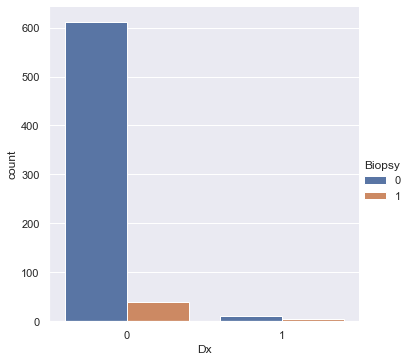

In [85]:
sns.catplot(data=st, kind="count", x="Dx", hue="Biopsy")

In [ ]:
sns.pairplot(data=st, hue="Biopsy")

In [ ]:
sns.displot(data=st, kind="ecdf", x="Smokespacksyear", col="Biopsy", hue="Hinselmann", rug=True)

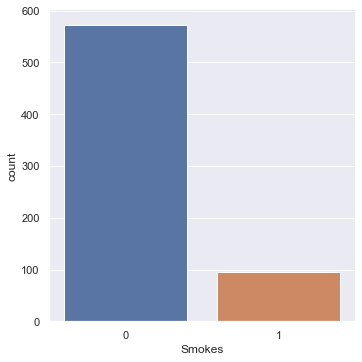

In [88]:
sns.catplot(data=st, kind="count", x="Smokes")

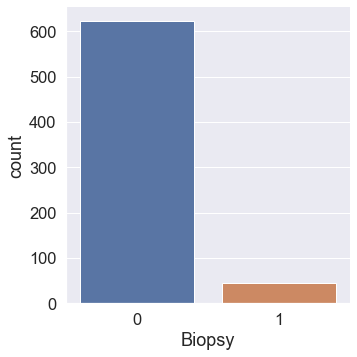

In [93]:
sns.set(font_scale=1.5)
sns.catplot(data=st, kind="count", x="Biopsy")